# ObsID : 0945020137, SRCNUM : 21, Instru : EMOS1
Not on Simbad

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [7]:
Spectrum(glob.glob("ObsID*SRCNUM*E*spectrum_grp.fits")[0])


2 spectra  in use
 
Spectral Data File: ObsID0945020137_SRCNUM21_EMOS1_spectrum_grp.fits  Spectrum 2
Net count rate (cts/s) for Spectrum:2  1.387e-03 +/- 4.972e-04 (35.5 % total)
 Assigned to Data Group 1 and Plot Group 2
  Noticed Channels:  1-2
  Telescope: XMM Instrument: EMOS1  Channel Type: PI
  Exposure Time: 1.818e+04 sec
 Using fit statistic: chi
 Using Background File                ObsID0945020137_SRCNUM21_EMOS1_background_spectrum.fits
  Background Exposure Time: 1.818e+04 sec
 Using Response (RMF) File            ObsID0945020137_SRCNUM21_EMOS1.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020137_SRCNUM21_EMOS1.arf


Fit statistic  : Chi-Squared              1.357362e+12     using 2 bins, spectrum 1.
                 Chi-Squared              1.357362e+12     using 2 bins, spectrum 2.
Total fit statistic                       2.714723e+12     with 1 d.o.f.

Test statistic : Chi-Squared              2.714723e+12     using 4 bins.
 Null hypothesis probability

## Plot spectrum

In [8]:
Plot.xAxis="keV"
#Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

***Warning: Fit is not current.


(-0.5, 865.5, 666.5, -0.5)

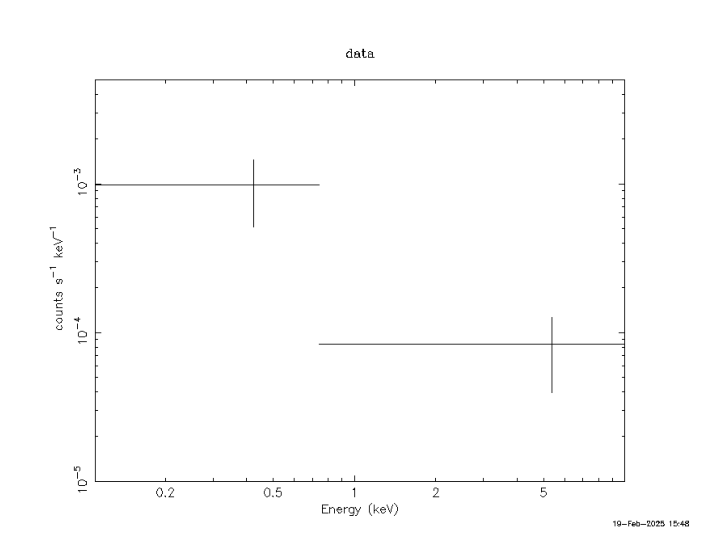

In [9]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum.png")[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [10]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
#Plot.device = "/xs"
Plot("data resid")
plt.show()


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.357362e+12     using 2 bins, spectrum 1.
                 Chi-Squared              1.357362e+12     using 2 bins, spectrum 2.
Total fit statistic                       2.714723e+12     with 1 d.o.f.

Test statistic : Chi-Squared              2.714723e+12     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
8.76074      0.00347764   -1      0.607845     

(-0.5, 857.5, 666.5, -0.5)

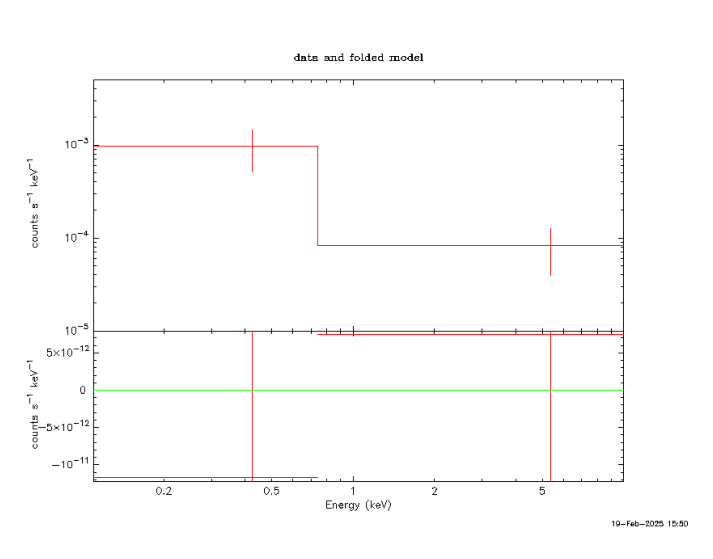

In [11]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbody.png")[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [12]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
#Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.079411e+10     using 2 bins, spectrum 1.
                 Chi-Squared              7.079411e+10     using 2 bins, spectrum 2.
Total fit statistic                       1.415882e+11     with 1 d.o.f.

Test statistic : Chi-Squared              1.415882e+11     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
7.46933      0.0253015    -2      0.144278    

(-0.5, 861.5, 666.5, -0.5)

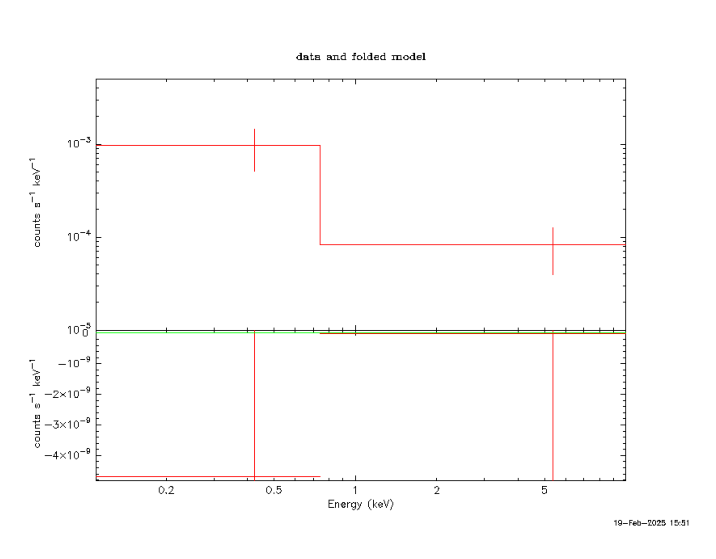

In [13]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremss.png")[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [14]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
#Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              9.163869e+09     using 2 bins, spectrum 1.
                 Chi-Squared              9.163869e+09     using 2 bins, spectrum 2.
Total fit statistic                       1.832774e+10     with 1 d.o.f.

Test statistic : Chi-Squared              1.832774e+10     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
         

(-0.5, 859.5, 662.5, -0.5)

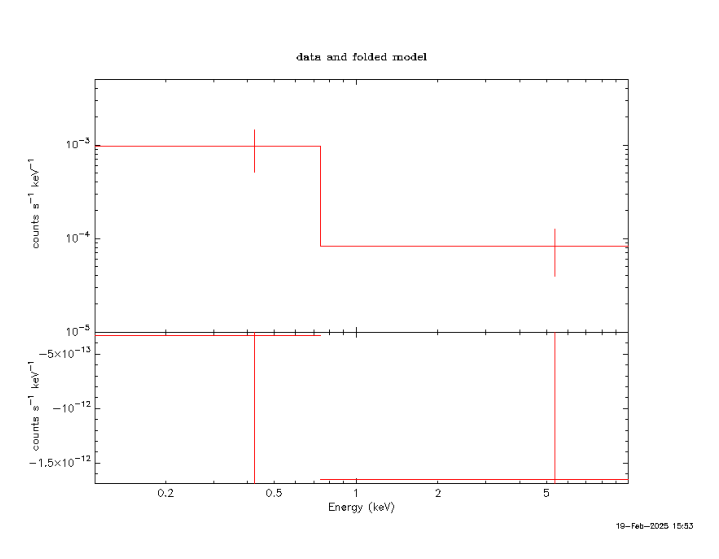

In [15]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apec.png")[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [16]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
#Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.302397e+11     using 2 bins, spectrum 1.
                 Chi-Squared              4.302397e+11     using 2 bins, spectrum 2.
Total fit statistic                       8.604795e+11     with 1 d.o.f.

Test statistic : Chi-Squared              8.604795e+11     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
7.3056       0.0177901    -2     0.0514830  

(-0.5, 861.5, 664.5, -0.5)

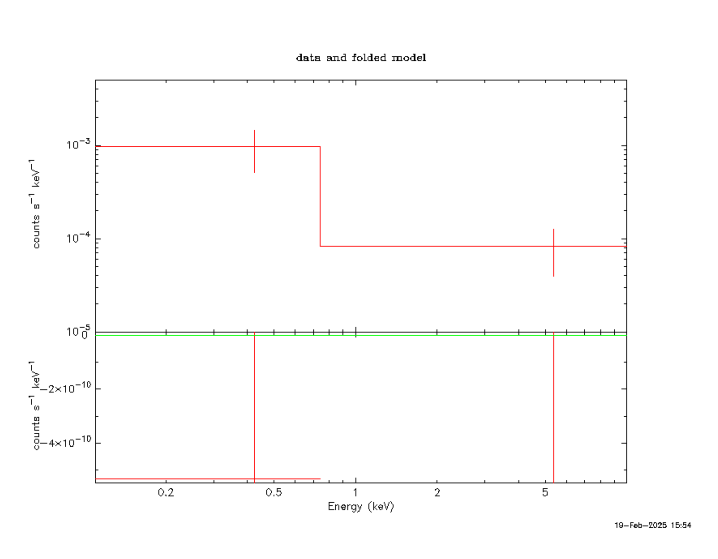

In [17]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_powerlaw.png")[0]))
plt.imshow(img)
plt.axis('off')

## Flux

In [18]:
AllModels.calcFlux(".2 12.0")

Spectrum Number: 1, 2
Data Group Number: 1
 Model Flux 1.6627e-05 photons (2.0704e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [20]:
Flux = 2.0704e-14 # ergs/cm^2/s

### ESASky
Aucune distance n'est diponible sur ESASky. https://sky.esa.int/esasky/?target=52.73766666666666%20-28.63463888888889&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033057.0-283804
- RA : 03h 30m 57.047s
- DEC : -28° 38' 04.16"